In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Importing Images Data

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_dataset = train_datagen.flow_from_directory(
    'data/train',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dataset = test_datagen.flow_from_directory(
    'data/test',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical',
    shuffle=True
)

Found 7178 images belonging to 7 classes.


## Creating Covnet

In [49]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [53]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x=train_dataset, validation_data=test_dataset, epochs = 50)

Epoch 1/50


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 103s 221ms/step - accuracy: 0.2347 - loss: 3.3054 - val_accuracy: 0.1950 - val_loss: 4.6447
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.3306 - loss: 1.6948 - val_accuracy: 0.4090 - val_loss: 1.5311
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 214ms/step - accuracy: 0.3690 - loss: 1.6095 - val_accuracy: 0.4075 - val_loss: 1.4927
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.3903 - loss: 1.5525 - val_accuracy: 0.4354 - val_loss: 1.4274
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4200 - loss: 1.4892 - val_accuracy: 0.4784 - val_loss: 1.3517
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4510 - loss: 1.4267 - val_accuracy: 0.4922 - val_loss: 1.2997
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4616 - loss: 1.3929 - val_accuracy: 0.5095 - val_loss: 1.2808
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4714 - loss: 1.3598 - va

In [ ]:
# Training again for another 25 Epochs
history = model.fit(x=train_dataset, validation_data=test_dataset, epochs = 25, initial_epochs = 50)

Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 157s 349ms/step - accuracy: 0.7818 - loss: 0.5807 - val_accuracy: 0.6493 - val_loss: 1.2075
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 161s 359ms/step - accuracy: 0.7810 - loss: 0.5941 - val_accuracy: 0.6517 - val_loss: 1.3660
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.7833 - loss: 0.5893 - val_accuracy: 0.6573 - val_loss: 1.2068
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.7903 - loss: 0.5666 - val_accuracy: 0.6519 - val_loss: 1.3160
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 154s 343ms/step - accuracy: 0.7964 - loss: 0.5550 - val_accuracy: 0.6566 - val_loss: 1.2631
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 149s 331ms/step - accuracy: 0.7974 - loss: 0.5501 - val_accuracy: 0.6558 - val_loss: 1.2931
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.8005 - loss: 0.5416 - val_accuracy: 0.6519 - val_loss: 1.3283
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 149s 332ms/step - accuracy: 0.8031 -

In [56]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy (Direct Evaluation): {test_accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.6602 - loss: 1.6984
Test Accuracy (Direct Evaluation): 66.04%


## Save and Load the Model

In [5]:
# model.save('FERClassifier.keras')
model = load_model('FERClassifier.keras')

## Training Dataset Heatmap

449/449 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step


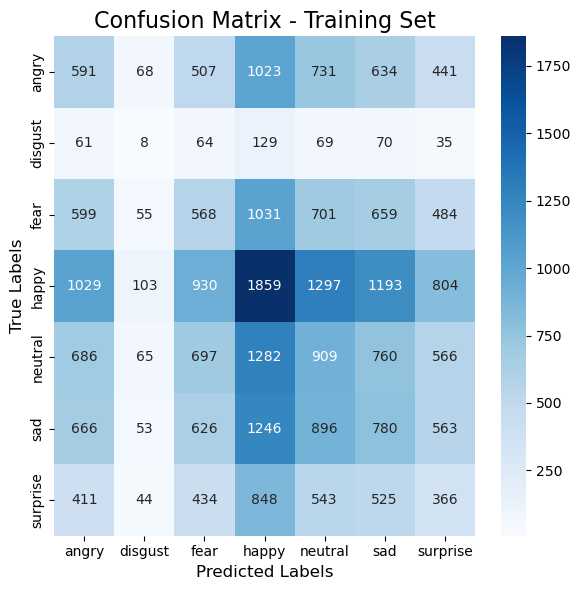

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(train_dataset)
y_pred = np.argmax(y_pred, axis=1)

class_labels = train_dataset.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())

cm_train = confusion_matrix(train_dataset.classes, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))

train_heatmap = sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=target_names, yticklabels=target_names)

# Customize plot
plt.title("Confusion Matrix - Training Set", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

## Test Dataset Heatmap

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step


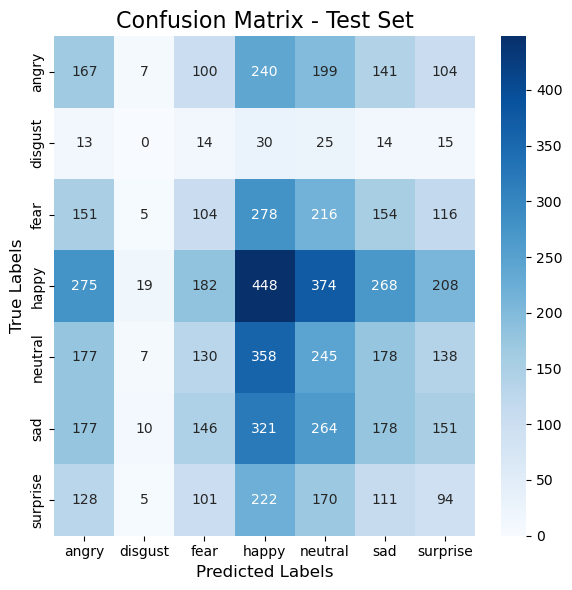

In [28]:
y_test_pred = model.predict(test_dataset)
y_test_pred = np.argmax(y_test_pred, axis=1)

plt.figure(figsize = (6, 6))

cm_test = confusion_matrix(test_dataset.classes, y_test_pred)

test_heatmap = sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=target_names, yticklabels=target_names)

# Customize plot
plt.title("Confusion Matrix - Test Set", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

## F1 Score

In [129]:
from sklearn.metrics import f1_score

batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

f1 = f1_score(true_labels, pred_labels, average='weighted')

print(f"F1 Score: {f1*100:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
F1 Score: 75.41


## Correctly Classified Images from Test Dataset

In [ ]:
batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

correct_indices = np.where(pred_labels == true_labels)[0]

print(f"{len(correct_indices)} correct out of {len(pred_labels)}")
print(f"Accuracy (Random Batch): {len(correct_indices)/len(pred_labels) * 100}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
45 correct out of 64
Accuracy (Random Batch): 70.3125


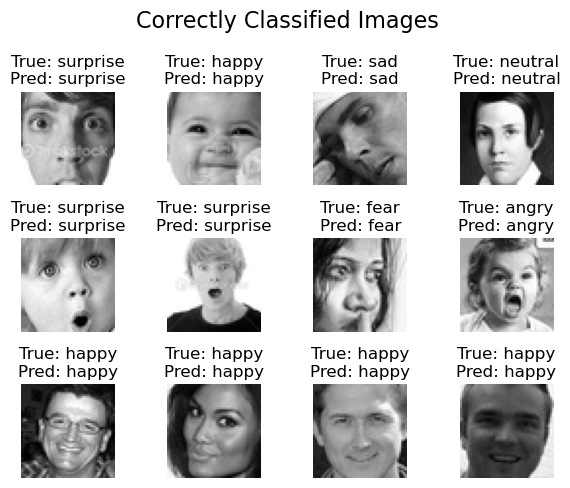

In [24]:
plt.figure(figsize=(6, 6))

for i, idx in enumerate(correct_indices[:12]):
    plt.subplot(4, 4, i + 1)
    plt.title(f"True: {target_names[true_labels[idx]]}\nPred: {target_names[pred_labels[idx]]}")
    plt.axis('off')
    plt.imshow(images[idx], cmap='gray')

plt.tight_layout()
plt.suptitle("Correctly Classified Images", fontsize=16, y=1.05)
plt.show()

## Incorrectly Classified Images from Test Dataset

In [ ]:
batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

correct_indices = np.where(pred_labels != true_labels)[0]

print(f"{len(correct_indices)} incorrect out of {len(pred_labels)}")
print(f"Misclassfication Rate (Random Batch): {len(correct_indices)/len(pred_labels) * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
16 incorrect out of 64
Loss (Random Batch): 25.00%


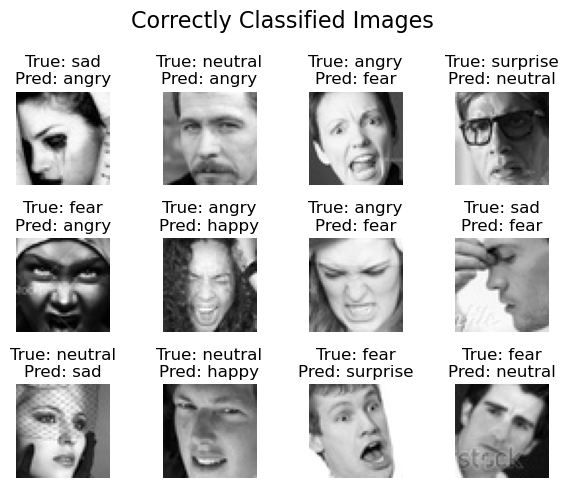

In [55]:
plt.figure(figsize=(6, 6))

for i, idx in enumerate(correct_indices[:12]):
    plt.subplot(4, 4, i + 1)
    plt.title(f"True: {target_names[true_labels[idx]]}\nPred: {target_names[pred_labels[idx]]}")
    plt.axis('off')
    plt.imshow(images[idx], cmap='gray')

plt.tight_layout()
plt.suptitle("Correctly Classified Images", fontsize=16, y=1.05)
plt.show()